important 変数を個々に定義する

In [1]:
SensorNum=5 # Sensor number
SampleNum=32 # Window Width
Overlap=0.5 # overlap
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccZ' # Axis

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-11'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccZ is registed now
Build Complete
(254742,)


In [8]:
windoW.shape

(7960, 32)

**前回やった学習をもう１度やってみる**

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.1179 - val_loss: 0.0057
Epoch 2/50
7960/7960 [==============================] - 2s - loss: 0.0026 - val_loss: 0.0013
Epoch 3/50
7960/7960 [==============================] - 2s - loss: 0.0011 - val_loss: 0.0012
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 8.9844e-04 - val_loss: 8.1960e-04
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 7.5340e-04 - val_loss: 7.8615e-04
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 6.4653e-04 - val_loss: 5.6969e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 5.6236e-04 - val_loss: 4.8253e-04
Epoch 8/50
7960/7960 [==============================] - 2s - loss: 4.9103e-04 - val_loss: 4.4779e-04
Epoch 9/50
7960/7960 [==============================] - 2s - loss: 4.3743e-04 - val_loss: 5.9892e-04
Epoch 10/50
7960/7960 [==============================] - 2s - loss:

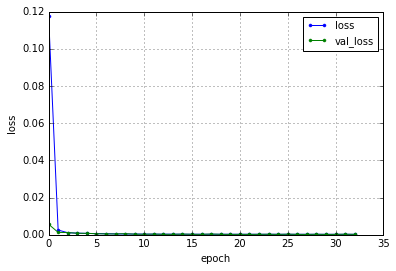

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.0556 - val_loss: 0.0018
Epoch 2/50
7960/7960 [==============================] - 2s - loss: 0.0012 - val_loss: 9.3906e-04
Epoch 3/50
7960/7960 [==============================] - 2s - loss: 8.9687e-04 - val_loss: 8.0441e-04
Epoch 4/50
7960/7960 [==============================] - 2s - loss: 7.5378e-04 - val_loss: 6.9225e-04
Epoch 5/50
7960/7960 [==============================] - 2s - loss: 6.4366e-04 - val_loss: 5.3779e-04
Epoch 6/50
7960/7960 [==============================] - 2s - loss: 5.4453e-04 - val_loss: 4.9137e-04
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 4.7331e-04 - val_loss: 5.5991e-04
Epoch 8/50
7960/7960 [==============================] - 2s - loss: 4.2486e-04 - val_loss: 3.3481e-04
Epoch 9/50
7960/7960 [==============================] - 2s - loss: 3.7891e-04 - val_loss: 4.3651e-04
Epoch 10/50
7960/7960 [==============================] 

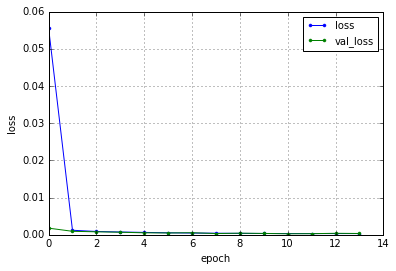

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0583 - val_loss: 0.0014
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0012 - val_loss: 9.3897e-04
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 8.4225e-04 - val_loss: 7.3903e-04
Epoch 4/50
7960/7960 [==============================] - 2s - loss: 6.6302e-04 - val_loss: 5.2922e-04
Epoch 5/50
7960/7960 [==============================] - 2s - loss: 5.2792e-04 - val_loss: 4.8635e-04
Epoch 6/50
7960/7960 [==============================] - 2s - loss: 4.3689e-04 - val_loss: 4.3015e-04
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 3.8567e-04 - val_loss: 3.5481e-04
Epoch 8/50
7960/7960 [==============================] - 2s - loss: 3.7346e-04 - val_loss: 2.7763e-04
Epoch 9/50
7960/7960 [==============================] - 2s - loss: 3.4382e-04 - val_loss: 2.7418e-04
Epoch 10/50
7960/7960 [==============================] 

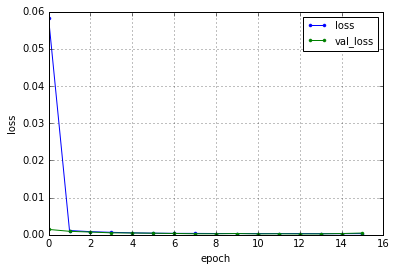

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.0361 - val_loss: 0.0010
Epoch 2/50
7960/7960 [==============================] - 2s - loss: 8.3952e-04 - val_loss: 6.2464e-04
Epoch 3/50
7960/7960 [==============================] - 2s - loss: 5.8069e-04 - val_loss: 4.4197e-04
Epoch 4/50
7960/7960 [==============================] - 2s - loss: 4.4249e-04 - val_loss: 4.0722e-04
Epoch 5/50
7960/7960 [==============================] - 2s - loss: 3.7062e-04 - val_loss: 2.7843e-04
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 3.4284e-04 - val_loss: 2.8278e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 3.2051e-04 - val_loss: 2.6398e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 3.1547e-04 - val_loss: 2.8735e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 3.2315e-04 - val_loss: 2.9194e-04
Epoch 10/50
7960/7960 [============================

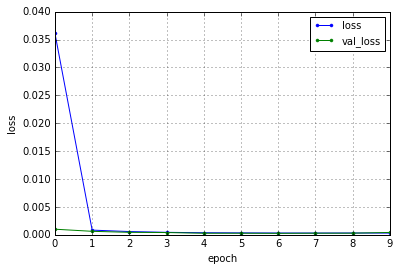

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0413 - val_loss: 0.0010
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 6.8733e-04 - val_loss: 4.8250e-04
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 4.4580e-04 - val_loss: 3.0928e-04
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 3.7680e-04 - val_loss: 3.0573e-04
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 3.4536e-04 - val_loss: 2.4544e-04
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 3.2504e-04 - val_loss: 2.7440e-04
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 3.2564e-04 - val_loss: 2.4419e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 3.1690e-04 - val_loss: 2.4347e-04
Epoch 9/50
7960/7960 [==============================] - 2s - loss: 3.2870e-04 - val_loss: 2.1357e-04
Epoch 10/50
7960/7960 [============================

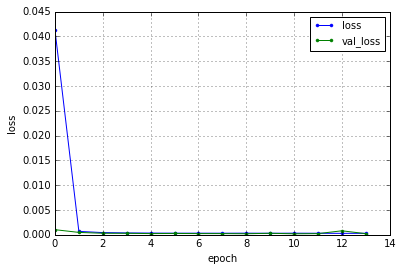

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.0373 - val_loss: 6.8635e-04
Epoch 2/50
7960/7960 [==============================] - 2s - loss: 5.3632e-04 - val_loss: 4.1476e-04
Epoch 3/50
7960/7960 [==============================] - 2s - loss: 4.4232e-04 - val_loss: 2.5998e-04
Epoch 4/50
7960/7960 [==============================] - 2s - loss: 3.9714e-04 - val_loss: 2.8407e-04
Epoch 5/50
7960/7960 [==============================] - 1s - loss: 3.8217e-04 - val_loss: 1.8396e-04
Epoch 6/50
7960/7960 [==============================] - 2s - loss: 3.8544e-04 - val_loss: 3.8588e-04
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 3.4127e-04 - val_loss: 5.0506e-04
Epoch 8/50
7960/7960 [==============================] - 2s - loss: 3.7454e-04 - val_loss: 2.1348e-04


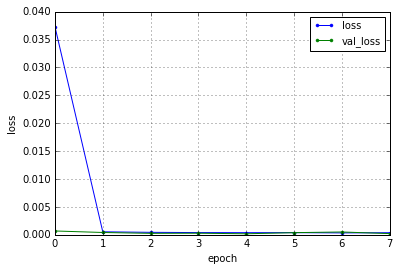

In [9]:
# define SaveFileName
for encoding_dim in EncodingDim:
    SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

    window_test=windoW
    window_train=windoW
    processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
    processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
    shapeNum=windoW.shape[1]

    # this is our input placeholder
    input_img = Input(shape=(shapeNum,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='tanh')(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(shapeNum, activation='linear')(encoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input=input_img, output=decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input=input_img, output=encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # create the decoder model
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

    autoencoder.compile(optimizer='adadelta', loss='mse')
    plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)
    hist = autoencoder.fit(window_train, window_train,
                    nb_epoch=50,
                    batch_size=shapeNum/4,
                    shuffle=True,
                    validation_data=(window_test, window_test),
                    callbacks=[early_stopping])

    encoded_imgs = encoder.predict(window_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
    processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

    # save model and wights
    json_string = encoder.to_json()
    open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
    encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5')

    json_string = decoder.to_json()
    open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
    decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5')

    json_string = autoencoder.to_json()
    open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
    autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5')

    # plot loss
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    nb_epoch = len(loss)
    plt.plot(range(nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
    plt.legend(loc='best', fontsize=10)
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.savefig(SaveFileNameGlaph)
    plt.show()